In [2]:
import os

from pathlib import Path

experiment_folder = Path('default_im_size_64_epochs_10/')
image_folder = experiment_folder / 'samples'

file_names = sorted((fn for fn in os.listdir(image_folder) if fn.endswith('.png')), key=lambda x: - int(x.split('.')[0].split('_')[-1]))
filtered_file_names = [file_names[i] for i in range(len(file_names)) if i % 10 == 9]

  0%|          | 0/100 [00:00<?, ?it/s]

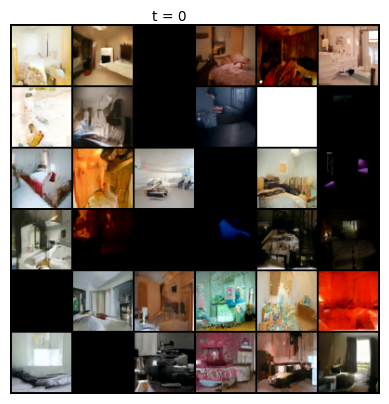

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
from IPython.display import HTML
from tqdm.auto import tqdm


images = [(file_name.split('.')[0].split('_')[1], Image.open(os.path.join(image_folder, file_name))) for file_name in filtered_file_names]

gif_fps = 10

plt.close('all')
fig, ax = plt.subplots()
ax.set_axis_off()

imgs = []

for t, img in tqdm(images):
    ax_img = ax.imshow(img, animated=True)
    title = ax.text(342 // 2, -5, f"t = {t}", ha='center', animated=True)
    imgs.append([ax_img, title])

animate = animation.ArtistAnimation(fig, imgs, interval=1000 // gif_fps, blit=True, repeat_delay=1000)
animate.save(experiment_folder/ f'{experiment_folder}.gif', writer=animation.PillowWriter(fps=gif_fps))